In [36]:
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import os
# import matplotlib.dates as mdates

# open file /run/secrets/postgres_pwd
with open(os.getenv("POSTGRES_PASSWORD_FILE"), 'r') as file:
    password = file.read().strip()

# Connect to your postgres DB
conn = psycopg2.connect(
    host="postgres",      # or IP address
    port=5432,             # default postgres port
    database=os.getenv("POSTGRES_DB"),
    user=os.getenv("POSTGRES_USER"),
    password="mysecretpassword"
)

In [22]:
query = """
SELECT 
    price
FROM customers
WHERE event_type='purchase'
GROUP BY product_id, price;
"""
df = pd.read_sql_query(query, conn)

/tmp/ipykernel_17294/4181923374.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [23]:
df.describe()

,price
count,66429.000000
mean,6.345624
std,9.869685
min,-79.370000
25%,2.370000
50%,4.130000
75%,6.700000
max,327.780000


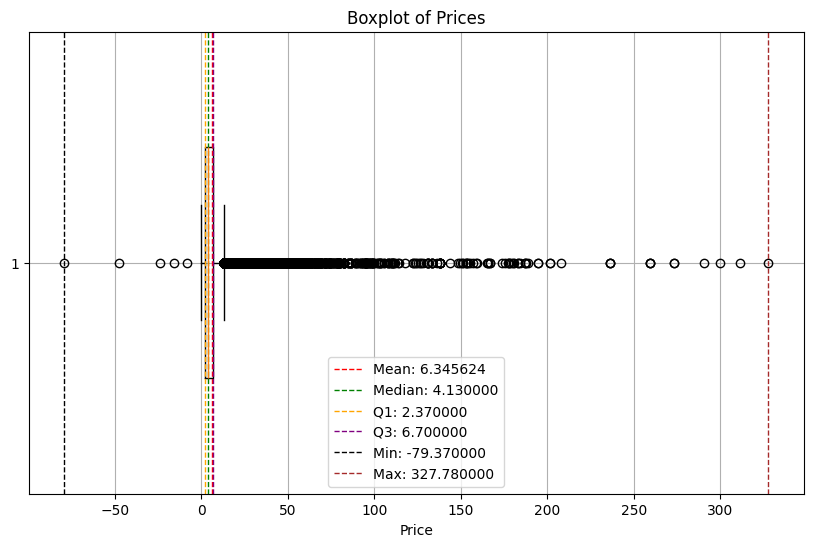

In [24]:
# plot boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False, widths=0.5)
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.grid()
plt.savefig('boxplot.png')
# legend mean, median, q1, q3, min, max with values formatted to 6 decimal places
plt.axvline(df['price'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {df["price"].mean():.6f}')
plt.axvline(df['price'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {df["price"].median():.6f}')
plt.axvline(df['price'].quantile(0.25), color='orange', linestyle='dashed', linewidth=1, label=f'Q1: {df["price"].quantile(0.25):.6f}')
plt.axvline(df['price'].quantile(0.75), color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {df["price"].quantile(0.75):.6f}')
plt.axvline(df['price'].min(), color='black', linestyle='dashed', linewidth=1, label=f'Min: {df["price"].min():.6f}')
plt.axvline(df['price'].max(), color='brown', linestyle='dashed', linewidth=1, label=f'Max: {df["price"].max():.6f}')
plt.legend()
plt.show()

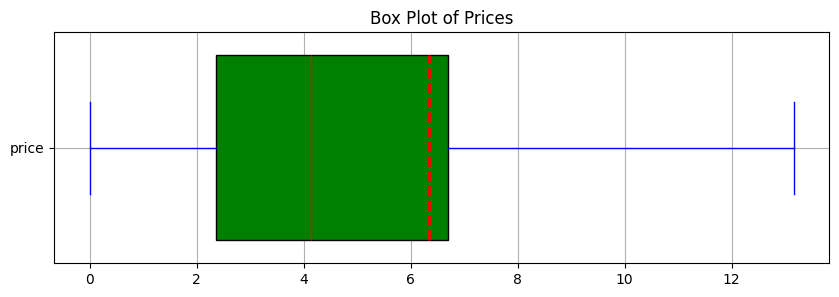

In [25]:
# plot boxplot without outliers
df.plot(
    kind='box', 
    figsize=(10, 3), 
    title='Box Plot of Prices', 
    grid=True, 
    color='blue', 
    patch_artist=True,
    boxprops=dict(facecolor='green', color='black'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue'),
    
    # flierprops=dict(marker='o', color='orange', alpha=0.5),
    showmeans=True,
    # meanprops=dict(marker='o', markerfacecolor='red', markersize=10, linestyle='None'),
    meanline=True,
    meanprops=dict(color='red', linewidth=2),

    # not showing outliers
    showfliers=False,

    # show box horizontal
    vert=False,

    # set box width
    widths=0.8,
)
plt.show()

In [45]:
# Then a box plot with the average basket price per user
sql = """
SELECT
	event_time::date,
	SUM(price) / COUNT(DISTINCT user_id) AS avg_price
FROM customers
WHERE event_type='purchase'
GROUP BY event_time::date
ORDER By avg_price DESC;
"""
df = pd.read_sql_query(sql, conn)

/tmp/ipykernel_17294/1055370360.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


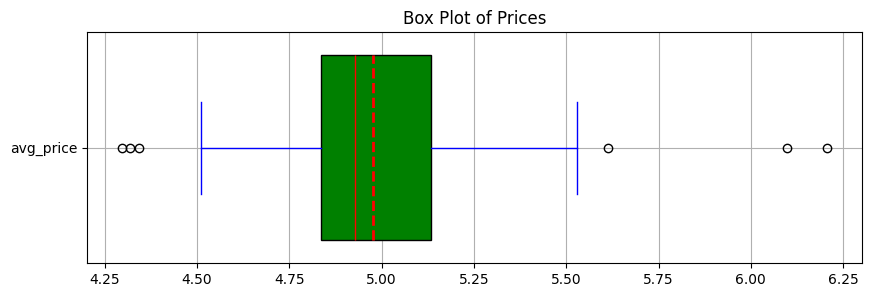

In [43]:
df.plot(
    kind='box', 
    figsize=(10, 3), 
    title='Box Plot of Prices', 
    grid=True, 
    color='blue', 
    patch_artist=True,
    boxprops=dict(facecolor='green', color='black'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue'),
    # flierprops=dict(marker='o', color='orange', alpha=0.5),
    showmeans=True,
    # meanprops=dict(marker='o', markerfacecolor='red', markersize=10, linestyle='None'),
    meanline=True,
    meanprops=dict(color='red', linewidth=2),

    # not showing outliers
    # showfliers=False,

    # show box horizontal
    vert=False,

    # set box width
    widths=0.8,
)

# set x axis limits
# plt.xlim(-10, 25)

plt.show()

In [28]:
conn.close()